In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston data set load
boston = load_boston()

#dataframe 변환
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기: ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


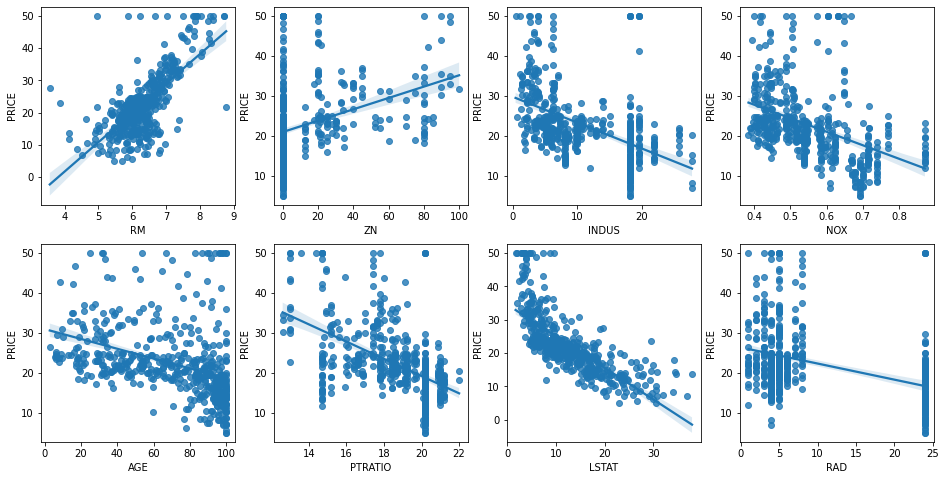

In [23]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig,axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #seaborn regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])
    

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RSME: {1:.3F}'.format(mse,rmse))
print('Variencne score: {0:.3f}'.format(r2_score(y_test,y_preds)))


MSE: 17.297, RSME: 4.159
Variencne score: 0.757


In [25]:
print('절편 값:', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_,1))

절편 값: 40.995595172165
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [26]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [29]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

#cross_val_score()로 5 fold 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 Negative RMSE scores: ', np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))


5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 Negative RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE: 5.829


In [31]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 다항식 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)


일차 다항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [33]:
def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수값:\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n',y)


일차 단항식 계수값:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [[ 1  5]
 [17 43]]


In [35]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

#선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)

print('Polynomical 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape:', model.coef_.shape)


3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomical 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 shape: (2, 10)


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X+X**2+X**3
    return y

#Pipeline 객체로 간소하게 다항식 피처 변환과 선형 회귀를 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다
y = true_fun(X) + np.random.randn(n_samples)*0.1

#pg 312 이어서..

In [44]:
#Ridge 회귀

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    #cross_val_score를 이용해 5 fold의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha{0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha,avg_rmse))


alpha0일 때 5 folds의 평균 RMSE: 5.829
alpha0.1일 때 5 folds의 평균 RMSE: 5.788
alpha1일 때 5 folds의 평균 RMSE: 5.653
alpha10일 때 5 folds의 평균 RMSE: 5.518
alpha100일 때 5 folds의 평균 RMSE: 5.330


In [62]:
#Lasso 회귀와 ElassticNet 회귀
from sklearn.linear_model import Lasso,ElasticNet

#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: 
        print('####### ',model_name,' ######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,X_data_n,y_target_n,scoring="neg_mean_squared_error",cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 fold 세트의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))
        #cross_val_score는 evaluation metric만 반환함으로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data,y_target)
        #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 column으로 추가
        coeff = pd.Series(data=model.coef_,index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
#end of get_linear_reg_eval



In [48]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)


#######  Lasso  ######
alpha 0.07일 때 5 fold 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 fold 세트의 평균 RMSE: 5.669
alpha 1일 때 5 fold 세트의 평균 RMSE: 5.776
alpha 3일 때 5 fold 세트의 평균 RMSE: 6.189


In [49]:
#반환된 coeff_lasso_df를 첫 번째 column순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [50]:
#ElasticNet에 사용된 alpha parameter의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_data,y_target_n=y_target)


#######  ElasticNet  ######
alpha 0.07일 때 5 fold 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 fold 세트의 평균 RMSE: 5.467
alpha 1일 때 5 fold 세트의 평균 RMSE: 5.597
alpha 3일 때 5 fold 세트의 평균 RMSE: 6.068


In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
#p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None',p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
        print('Standard')
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
        print('minmax')
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
        
    return scaled_data


In [64]:
#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1,1,10,100]

#5개 방식으로 변환, 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0],p_degree=scale_method[1],input_data=X_data)
    print('\n## 변환 유형:{0}. Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas,X_data_n=X_data_scaled,y_target_n=y_target,verbose=False)
    


## 변환 유형:None. Polynomial Degree:None
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 5.788
alpha 1일 때 5 fold 세트의 평균 RMSE: 5.653
alpha 10일 때 5 fold 세트의 평균 RMSE: 5.518
alpha 100일 때 5 fold 세트의 평균 RMSE: 5.330
Standard

## 변환 유형:Standard. Polynomial Degree:None
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 5.826
alpha 1일 때 5 fold 세트의 평균 RMSE: 5.803
alpha 10일 때 5 fold 세트의 평균 RMSE: 5.637
alpha 100일 때 5 fold 세트의 평균 RMSE: 5.421
Standard

## 변환 유형:Standard. Polynomial Degree:2
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 8.827
alpha 1일 때 5 fold 세트의 평균 RMSE: 6.871
alpha 10일 때 5 fold 세트의 평균 RMSE: 5.485
alpha 100일 때 5 fold 세트의 평균 RMSE: 4.634
minmax

## 변환 유형:MinMax. Polynomial Degree:None
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 5.764
alpha 1일 때 5 fold 세트의 평균 RMSE: 5.465
alpha 10일 때 5 fold 세트의 평균 RMSE: 5.754
alpha 100일 때 5 fold 세트의 평균 RMSE: 7.635
minmax

## 변환 유형:MinMax. Polynomial Degree:2
alpha 0.1일 때 5 fold 세트의 평균 RMSE: 5.298
alpha 1일 때 5 fold 세트의 평균 RMSE: 4.323
alpha 10일 때 5 fold 세트의 평균 RMSE: 5.185
alpha 100일 때 5 fold 세트의 평균 RMSE: 6.538

#

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)


In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score

#logistic regression 을 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test,lr_preds)))


accuracy: 0.977
roc_auc: 0.972


In [73]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'],'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0} 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))


최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'} 최적 평균 정확도:0.975


/Users/hyejun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hyejun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hyejun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/hyejun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hyejun/opt

In [74]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 Negative RMSE scores: ', np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))


5 folds 의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds 의 개별 Negative RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 folds 의 평균 RMSE: 4.423


In [79]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
    

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

dt_reg = DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)


#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE: 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE: 4.269
#### XGBRegressor ####
5 교차 검증의 평균 RMSE: 4.251
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE: 4.646


<AxesSubplot:>

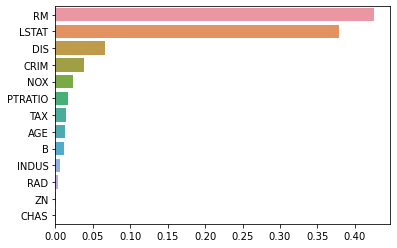

In [82]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data,y_target 데이터 세트를 적용해 학습힘니다.
rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)


(100, 2)


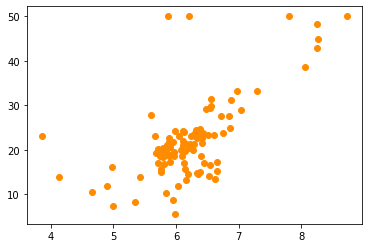

In [85]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c="darkorange")
